In [1]:
# auto-reload modules when they have changed
%reload_ext autoreload
%autoreload 2

In [2]:
from modules.analyze.blob_detection import BlobDetector
from modules.load import image
from config import config as cfg

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#path = cfg.image_FIDA_path
path = '/Users/kappel/Messungen/Setup04/JaKa/post_hack/23_07_06/control-77K-buffer+glycerol-vitrified/10uW/images/img_control_NaP_100mM_ph7dot5_Glycerol10_10uW_77K_circpol_20um_001.img'

In [4]:
# Load image
im = image.load_from_path(path)

0 19
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


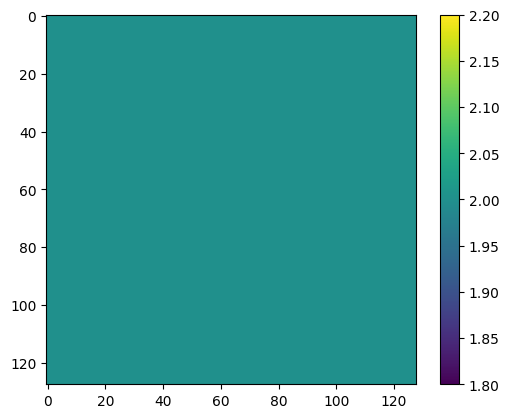

In [5]:
image_data = im.data['preview']

min_intensity = np.amin(image_data)
max_intensity = np.amax(image_data)

print(min_intensity, max_intensity)

from scipy import ndimage

# Apply a median filter to the image
background = ndimage.median_filter(image_data, size=50)

# Subtract the background from the image
image_without_background = image_data - background

# Set negative values to 0
image_without_background = np.clip(image_without_background, 0, None)

print(background)
plt.imshow(background)
plt.colorbar()

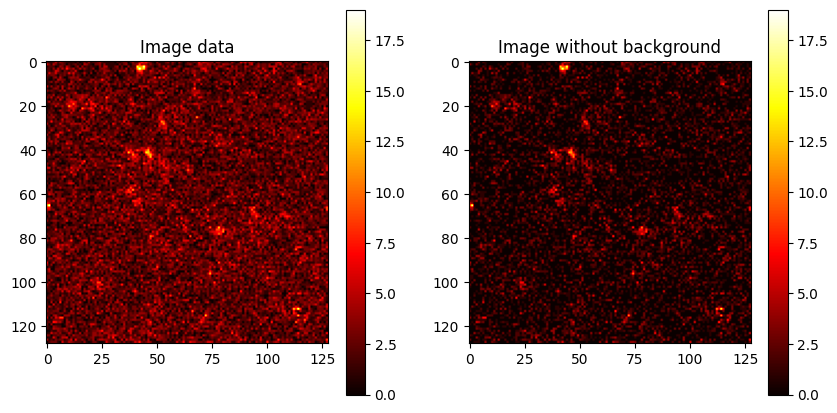

In [6]:
# create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
# plot image with background in first subplot
im1 = axes[0].imshow(image_data, cmap=plt.cm.hot, vmin=0, vmax=max_intensity)
# add a title to the first subplot
axes[0].set_title('Image data')
# plot image without background in second subplot
im2 = axes[1].imshow(image_without_background, cmap=plt.cm.hot, vmin=0, vmax=max_intensity)
# add a title to the second subplot
axes[1].set_title('Image without background')

# add color bar to both subplots
fig.colorbar(im1, ax=axes[0], shrink=0.5)
fig.colorbar(im2, ax=axes[1], shrink=0.5)

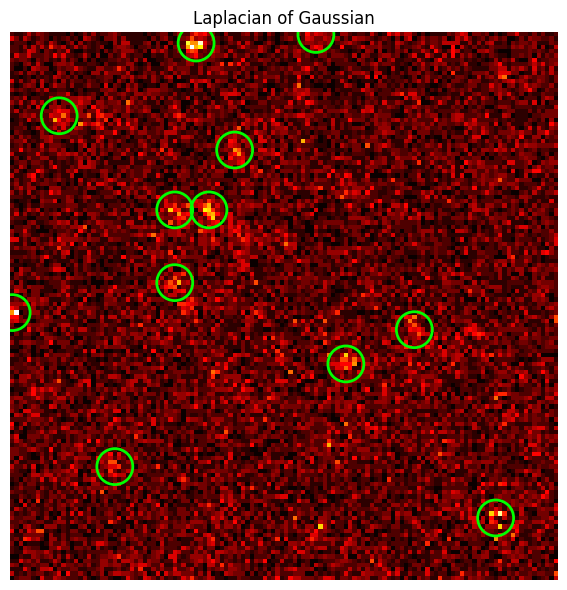

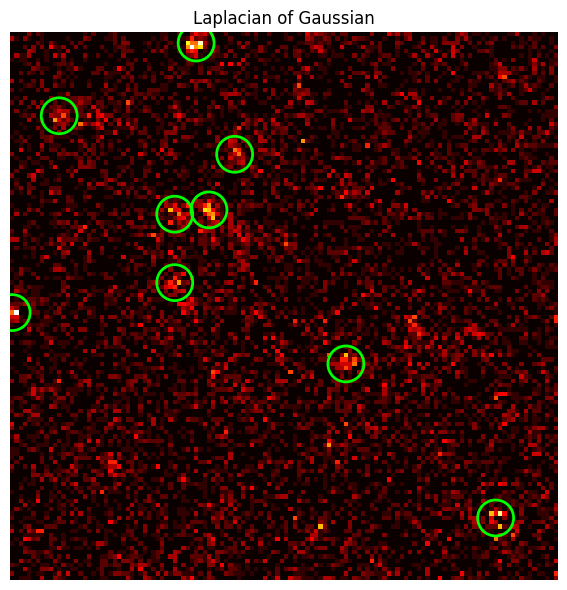

In [7]:
# Initialize blob detector
bd_raw = BlobDetector(input_image=image_data, blob_type='log')
bd_fil = BlobDetector(input_image=image_without_background, blob_type='log')

# Detect blobs
blobs_raw = bd_raw.detect_blobs(min_sigma=3, max_sigma=4, num_sigma=10, threshold=0.005);
blobs_fil = bd_fil.detect_blobs(min_sigma=3, max_sigma=4, num_sigma=10, threshold=0.005);


# TODO: Plot blobs on image
bd_raw.plot_blobs(blobs_raw)
bd_fil.plot_blobs(blobs_fil)


In [10]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
from skimage.metrics import structural_similarity as ssim

# Compute the MSE for different values of the median filter size
for size in range(20, 21):
    # Apply a median filter to the image
    background = ndimage.median_filter(image_data, size=size)
    # Subtract the background from the image
    image_without_background = image_data - background
    # Compute the MSE between the filtered image and the original image
    mse = mean_squared_error(image_data, image_without_background)
    print(f"Median filter size: {size}, MSE: {mse}")

# Compute the PSNR for different values of the median filter size
for size in range(20, 60):
    # Apply a median filter to the image
    background = ndimage.median_filter(image_data, size=size)
    # Subtract the background from the image
    image_without_background = image_data - background
    # Compute the PSNR between the filtered image and the original image
    psnr = peak_signal_noise_ratio(image_data, image_without_background)
    print(f"Median filter size: {size}, PSNR: {psnr}")

# Compute the SSIM for different values of the median filter size
for size in range(20, 41):
    # Apply a median filter to the image
    background = ndimage.median_filter(image_data, size=size)
    # Subtract the background from the image
    image_without_background = image_data - background
    # Compute the SSIM between the filtered image and the original image
    ssim_value = ssim(image_data, image_without_background, multichannel=True)
    print(f"Median filter size: {size}, SSIM: {ssim_value}")

Median filter size: 20, MSE: 4.54443359375
Median filter size: 20, PSNR: 372.72299692052565
Median filter size: 21, PSNR: 372.7991975996499
Median filter size: 22, PSNR: 372.8322688163439
Median filter size: 23, PSNR: 372.8967474043341
Median filter size: 24, PSNR: 372.93026688213985
Median filter size: 25, PSNR: 372.9668225796584
Median filter size: 26, PSNR: 372.9853713677773
Median filter size: 27, PSNR: 373.0096038399327
Median filter size: 28, PSNR: 373.0214585655019
Median filter size: 29, PSNR: 373.0449514399021
Median filter size: 30, PSNR: 373.05627331966576
Median filter size: 31, PSNR: 373.07679066056824
Median filter size: 32, PSNR: 373.08597591452644
Median filter size: 33, PSNR: 373.1028131184525
Median filter size: 34, PSNR: 373.1149253817657
Median filter size: 35, PSNR: 373.1334778949912
Median filter size: 36, PSNR: 373.14921356858224
Median filter size: 37, PSNR: 373.18150519059316
Median filter size: 38, PSNR: 373.20555652480374
Median filter size: 39, PSNR: 373.233

/var/folders/2h/6xcys3mx1s7czfj28g_dc70r0000gn/T/ipykernel_27079/2786588433.py:31: UserWarning: Setting data_range based on im1.dtype. data_range = 18446744073709551616. Please specify data_range explicitly to avoid mistakes.
  ssim_value = ssim(image_data, image_without_background, multichannel=True)


Median filter size: 22, SSIM: 1.0
Median filter size: 23, SSIM: 1.0
Median filter size: 24, SSIM: 1.0
Median filter size: 25, SSIM: 1.0
Median filter size: 26, SSIM: 1.0
Median filter size: 27, SSIM: 1.0
Median filter size: 28, SSIM: 1.0
Median filter size: 29, SSIM: 1.0
Median filter size: 30, SSIM: 1.0
Median filter size: 31, SSIM: 1.0
Median filter size: 32, SSIM: 1.0
Median filter size: 33, SSIM: 1.0
Median filter size: 34, SSIM: 1.0
Median filter size: 35, SSIM: 1.0
Median filter size: 36, SSIM: 1.0
Median filter size: 37, SSIM: 1.0
Median filter size: 38, SSIM: 1.0
Median filter size: 39, SSIM: 1.0
Median filter size: 40, SSIM: 1.0


In [9]:
print(blobs)
blob_data = blobs

NameError: name 'blobs' is not defined

In [ ]:
blobs_log = blob_data
blobs = []

image_array = im.data['APD1'] + im.data['APD2']

for blob in blobs_log:
    # Get blob coordinates and radius
    y, x, r = blob

    # Extract blob pixels from original image
    blob_pixels = image_array[int(y - r):int(y + r), int(x - r):int(x + r)]

    # Do something with blob pixels
    # ...
    print(blob_pixels)
    print(blob_pixels.shape)

    if blob_pixels.shape[0] == blob_pixels.shape[1]: 
        blobs.append(blob_pixels)
    else: 
        print("Blob not square")

    #plt.imshow(blob_pixels, cmap='gray')
    #plt.show()



In [ ]:
# Create grid of subplots
num_subplots = len(blobs)
num_cols = 4
num_rows = (num_subplots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Create list to store average intensities
avg_intensities = []
max_intensities = []

# Loop over blobs and plot in subplots
for i, blob in enumerate(blobs):
    # Calculate average intensity
    avg_intensity = np.mean(blob)

    # Calculate max intensity
    max_intensity = np.max(blob)

    avg_intensities.append(avg_intensity)
    max_intensities.append(max_intensity)

    # Plot blob in subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(blob, cmap='gray')
    ax.set_title(f'Blob {i+1}', fontsize=8)
    plt.subplots_adjust(hspace = 0.5)
    plt.subplots_adjust(wspace = 0.1)
    ax.text(2, 0.5, f'avg. int: {int(avg_intensity)}\nmax. int.: {int(max_intensity)}', size=8, ha="right", va="center", bbox=dict(facecolor='white', alpha=0.5), transform=ax.transAxes)
    ax.set_axis_off()

# Hide unused subplots
for i in range(num_subplots, num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.axis('off')

textstr = ''

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

#plt.tight_layout()
plt.axis
plt.show()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1000x1000 with 0 Axes>

[6, 5, 4, 5, 4, 4, 4, 4, 4]
[14, 13, 11, 13, 12, 12, 10, 9, 17]


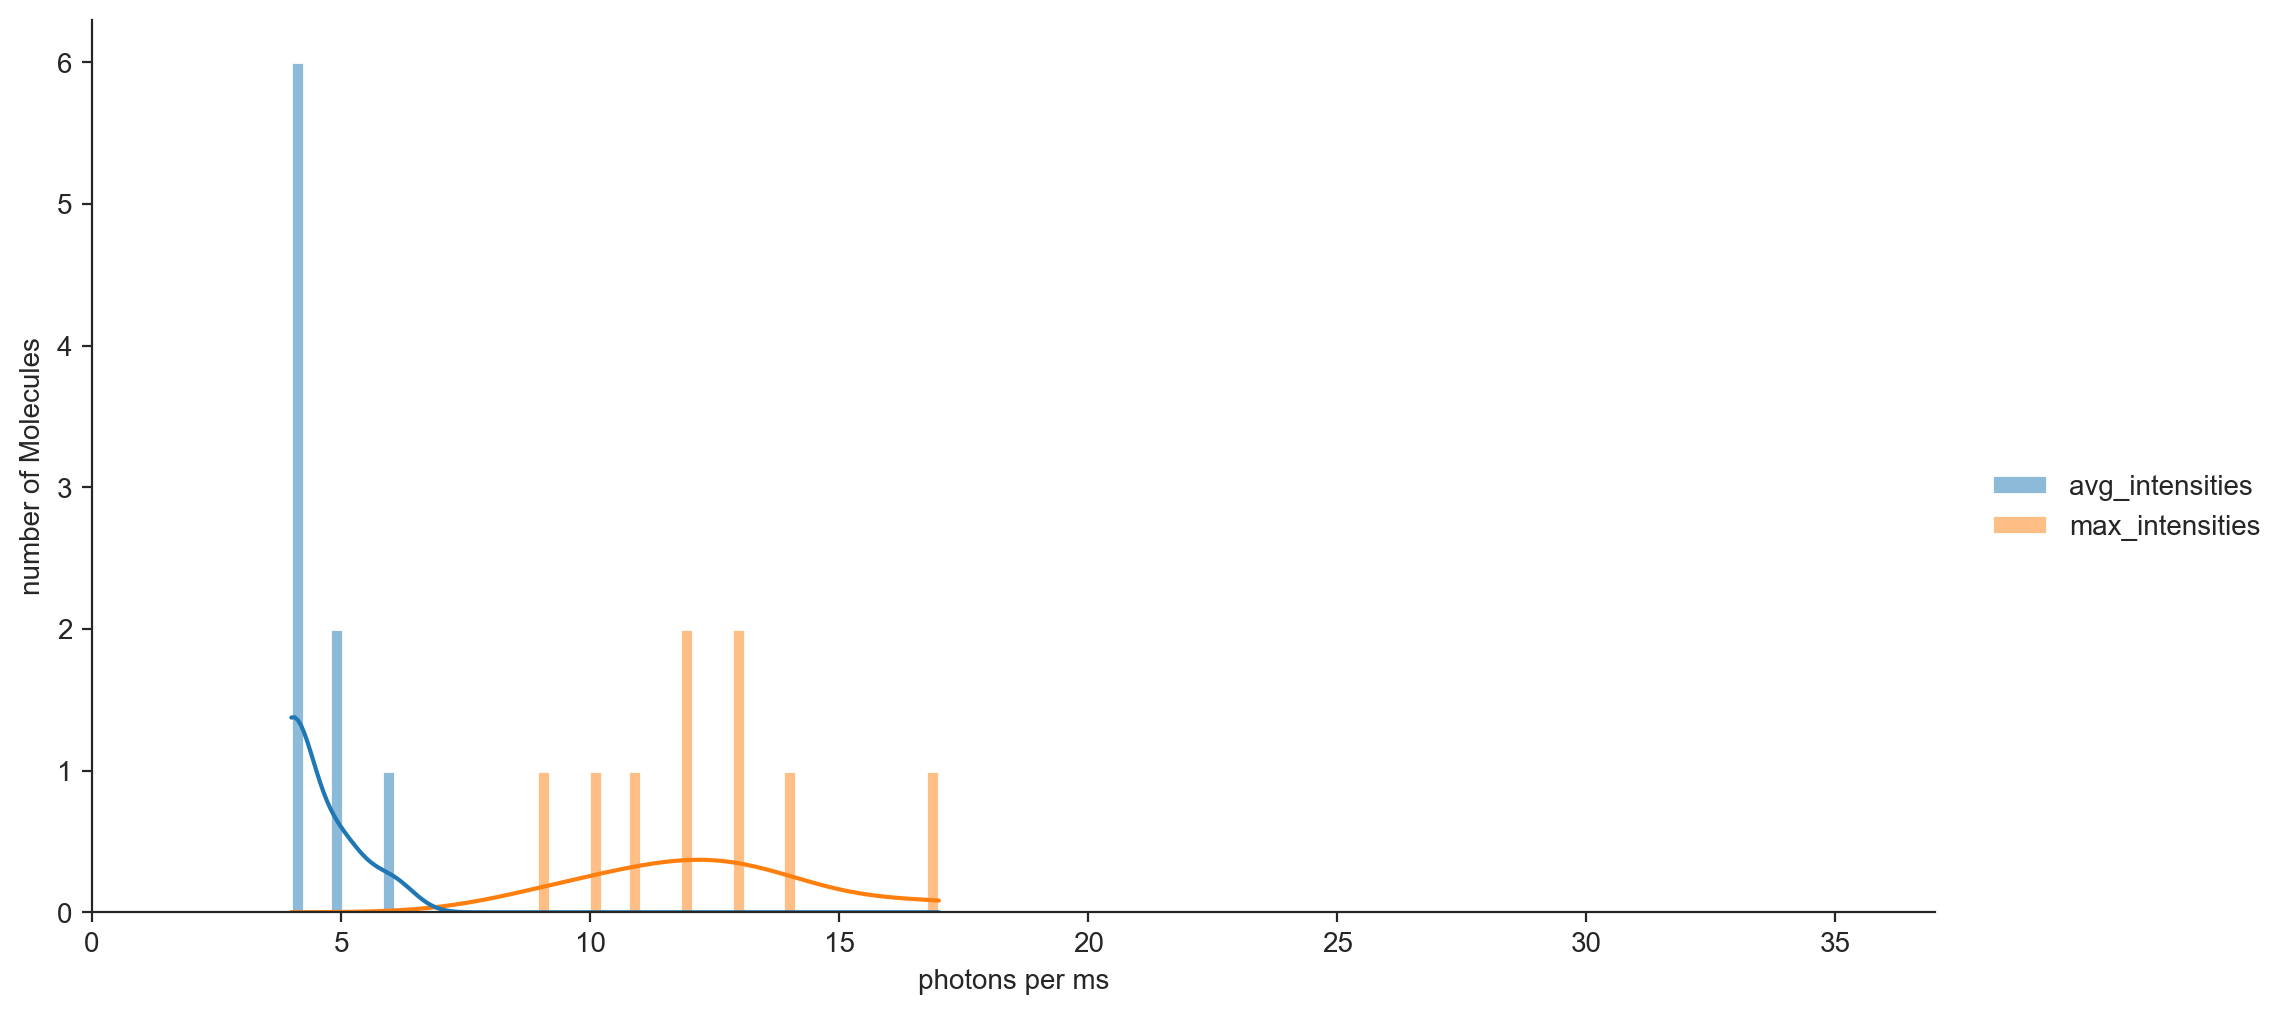

In [ ]:
# Calculate histogram parameters
r_avg_intensities = [round(intensity) for intensity in avg_intensities]
r_max_intensities = [round(intensity) for intensity in max_intensities]

print(r_avg_intensities)
print(r_max_intensities)

# Create Pandas dataframe for avg_intensities and max_intensities
df = pd.DataFrame({'avg_intensities': r_avg_intensities, 'max_intensities': r_max_intensities})

if np.min(r_avg_intensities) >= np.min(r_max_intensities):
    max_bin = np.max(r_avg_intensities)
else:
    max_bin = np.max(r_max_intensities)



min_val = np.min(r_max_intensities)
max_val = np.max(r_max_intensities)

val_width = max_val - min_val
n_bins = 50
bin_width = val_width/n_bins

# Create barplot for histogram of average intensities
sns.set_style('white')
sns.displot(data=df, 
            bins=n_bins, 
            #binrange=(min_val, max_val), 
            kind='hist', 
            kde=True, 
            edgecolor='white', 
            height=5, 
            aspect=2)


# Set axis
plt.xlabel('photons per ms')
plt.ylabel('number of Molecules')
plt.tick_params(axis='both', which='both', bottom=True, left=True)
#plt.xticks(np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width))
plt.xlim(0, max_bin+20)
plt.show()